# Configurations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

N_SAMPLES = 2000        # Total number of synthetic data points
N_FEATURES = 2          # Input dimensions
N_CLASSES = 5           # Number of distinct classes
H1_NEURONS = 64         # Neurons in Hidden Layer 1
H2_NEURONS = 32         # Neurons in Hidden Layer 2
H3_NEURONS = 16         # Neurons in Hidden Layer 3
LEARNING_RATE = 0.01    # Learning rate
EPOCHS = 10000          # Number of training iterations
BATCH_SIZE = 32         # Mini-batch size
L2_LAMBDA = 0.001       # L2 regularization strength
SEED = 35

# Dataset generation & Preprocessing

In [2]:
def generate_multi_class_data(n_samples=N_SAMPLES, n_features=N_FEATURES, n_classes=N_CLASSES, random_state=SEED):
    """
    Generates a synthetic dataset suitable for multi-class classification.
    """
    X, y_int = make_blobs(
        n_samples=n_samples, 
        centers=n_classes, 
        n_features=n_features, 
        cluster_std=0.5, 
        center_box=(-10, 10),
        random_state=random_state
    )
    
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / (std + 1e-8)
    
    y_one_hot = np.zeros((y_int.size, n_classes))
    y_one_hot[np.arange(y_int.size), y_int] = 1
    
    return X, y_one_hot, y_int

def plot_data(X, y_int):
    """
    Visualizes the generated 5-class synthetic dataset.
    """
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y_int, cmap='viridis', s=20)
    plt.title('Generated 5-Class Synthetic Dataset')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Neural Network Class with 3 hidden layers

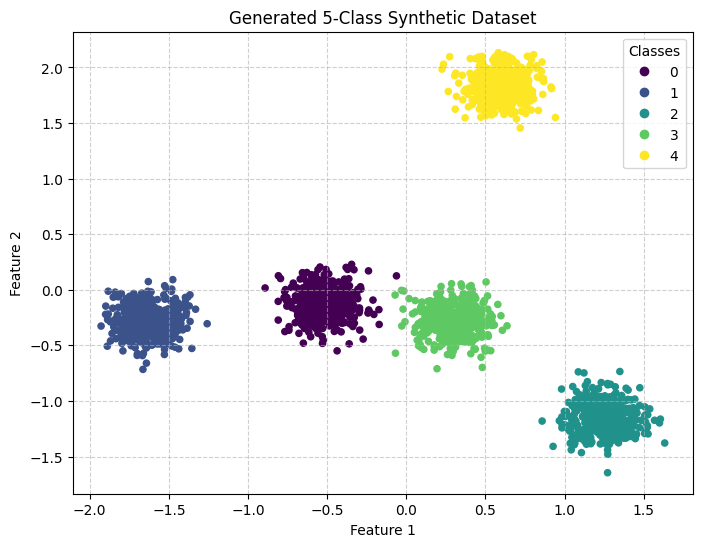

Training Set Size: 1600 samples
Testing Set Size: 400 samples

--- Training Model ---
Epoch 1000/10000 | Train Loss: 0.0047 | Test Loss: 0.0006 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 2000/10000 | Train Loss: 0.0045 | Test Loss: 0.0004 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 3000/10000 | Train Loss: 0.0043 | Test Loss: 0.0004 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 4000/10000 | Train Loss: 0.0042 | Test Loss: 0.0004 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 5000/10000 | Train Loss: 0.0041 | Test Loss: 0.0004 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 6000/10000 | Train Loss: 0.0040 | Test Loss: 0.0004 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 7000/10000 | Train Loss: 0.0040 | Test Loss: 0.0004 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 8000/10000 | Train Loss: 0.0039 | Test Loss: 0.0004 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 9000/10000 | Train Loss: 0.0038 | Test Loss: 0.0003 | Train Acc: 100.00% | Test Acc: 100.00%
Epoch 10000/10000 | Tra

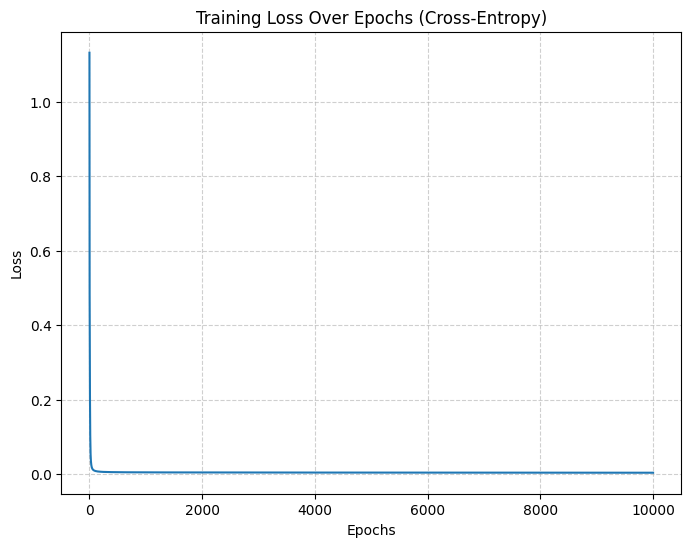


--- Model Evaluation ---
Overall Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        70
     Class 1       1.00      1.00      1.00        90
     Class 2       1.00      1.00      1.00        71
     Class 3       1.00      1.00      1.00        96
     Class 4       1.00      1.00      1.00        73

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



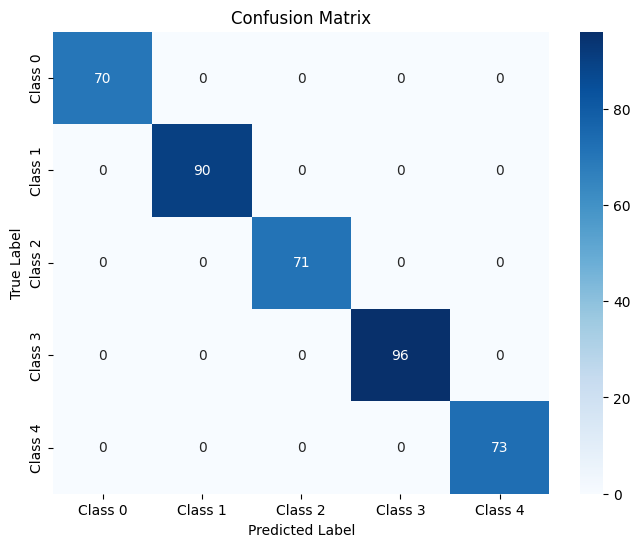

In [3]:


# 2. Neural Network Class with 3 Hidden Layers

class NeuralNetwork(object):
    """
    Implementation of a Feedforward Neural Network with three hidden layers
    for multi-class classification using Softmax and Cross-Entropy Loss.
    """
    def __init__(self, inputLayerNeurons, H1_neurons, H2_neurons, H3_neurons, outLayerNeurons, learning_rate, l2_lambda=0.0):

        self.lr = learning_rate
        self.l2_lambda = l2_lambda
        
        self.W1 = np.random.randn(inputLayerNeurons, H1_neurons) * np.sqrt(2.0 / inputLayerNeurons)
        self.b1 = np.zeros((1, H1_neurons))
        
        self.W2 = np.random.randn(H1_neurons, H2_neurons) * np.sqrt(2.0 / H1_neurons)
        self.b2 = np.zeros((1, H2_neurons))
        
        self.W3 = np.random.randn(H2_neurons, H3_neurons) * np.sqrt(2.0 / H2_neurons)
        self.b3 = np.zeros((1, H3_neurons))
        
        self.W4 = np.random.randn(H3_neurons, outLayerNeurons) * np.sqrt(1.0 / H3_neurons)
        self.b4 = np.zeros((1, outLayerNeurons))


    def ReLU(self, x, der=False):
        """ReLU activation and its derivative for hidden layers."""
        if der:
            return (x > 0).astype(float)
        return np.maximum(0, x)

    def Softmax(self, x):
        """Softmax activation for the output layer (converts scores to probabilities)."""

        exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    
    def cross_entropy_loss(self, pred, Y):
        """Calculates the categorical Cross-Entropy Loss with L2 regularization."""
        m = Y.shape[0]
        epsilon = 1e-12 
        pred = np.clip(pred, epsilon, 1. - epsilon)
        
        ce_loss = -np.sum(Y * np.log(pred)) / m
        
        l2_loss = (self.l2_lambda / (2 * m)) * (
            np.sum(self.W1**2) + np.sum(self.W2**2) + 
            np.sum(self.W3**2) + np.sum(self.W4**2)
        )
        
        return ce_loss + l2_loss

    
    def feedForward(self, X):
        """Propagates input through the three hidden layers and output layer."""
        
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.ReLU(self.Z1)
        
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.ReLU(self.Z2)
        
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.ReLU(self.Z3)
        
        self.Z4 = np.dot(self.A3, self.W4) + self.b4
        pred = self.Softmax(self.Z4)
        
        return pred

    def backPropagation(self, X, Y, pred):
        """
        Calculates gradients and updates weights/biases using Gradient Descent with L2 regularization.
        The derivative for Softmax + Cross-Entropy is simply (pred - Y).
        """
        m = X.shape[0]
        
        dZ4 = pred - Y
        dW4 = (1/m) * np.dot(self.A3.T, dZ4) + (self.l2_lambda / m) * self.W4
        db4 = (1/m) * np.sum(dZ4, axis=0, keepdims=True)
        
        dA3 = np.dot(dZ4, self.W4.T)
        dZ3 = dA3 * self.ReLU(self.Z3, der=True)
        dW3 = (1/m) * np.dot(self.A2.T, dZ3) + (self.l2_lambda / m) * self.W3
        db3 = (1/m) * np.sum(dZ3, axis=0, keepdims=True)
        
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * self.ReLU(self.Z2, der=True)
        dW2 = (1/m) * np.dot(self.A1.T, dZ2) + (self.l2_lambda / m) * self.W2
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.ReLU(self.Z1, der=True)
        dW1 = (1/m) * np.dot(X.T, dZ1) + (self.l2_lambda / m) * self.W1
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
        
        self.W4 -= self.lr * dW4
        self.b4 -= self.lr * db4
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        
    def train(self, X, Y):
        """Performs one step of feedforward and backpropagation."""
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)
        return self.cross_entropy_loss(output, Y)
    
    def predict(self, X):
        """Predicts class labels for a given input."""
        probabilities = self.feedForward(X)
        return np.argmax(probabilities, axis=1)

# 3. Training and Evaluation

def evaluate_model(y_true_int, y_pred_int, class_labels):
    """
    Calculates and prints performance metrics, including the confusion matrix.
    """
    print("\n--- Model Evaluation ---")
    
    accuracy = accuracy_score(y_true_int, y_pred_int) * 100
    print(f"Overall Accuracy: {accuracy:.2f}%\n")
    
    report = classification_report(y_true_int, y_pred_int, target_names=[f'Class {i}' for i in class_labels], zero_division=0)
    print("Classification Report:\n", report)
    
    cm = confusion_matrix(y_true_int, y_pred_int)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=[f'Class {i}' for i in class_labels], 
                yticklabels=[f'Class {i}' for i in class_labels])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def get_mini_batches(X, Y, batch_size):
    """Generate mini-batches for training."""
    m = X.shape[0]
    mini_batches = []
    
    permutation = np.random.permutation(m)
    X_shuffled = X[permutation]
    Y_shuffled = Y[permutation]
    
    num_complete_batches = m // batch_size
    for k in range(num_complete_batches):
        mini_batch_X = X_shuffled[k * batch_size:(k + 1) * batch_size]
        mini_batch_Y = Y_shuffled[k * batch_size:(k + 1) * batch_size]
        mini_batches.append((mini_batch_X, mini_batch_Y))
    
    if m % batch_size != 0:
        mini_batch_X = X_shuffled[num_complete_batches * batch_size:]
        mini_batch_Y = Y_shuffled[num_complete_batches * batch_size:]
        mini_batches.append((mini_batch_X, mini_batch_Y))
    
    return mini_batches

# 4. Main Execution

if __name__ == '__main__':
    np.random.seed(SEED)
    
    X, Y_one_hot, Y_int = generate_multi_class_data()
    plot_data(X, Y_int)
    
    X_train, X_test, Y_train_oh, Y_test_oh, Y_train_int, Y_test_int = train_test_split(
        X, Y_one_hot, Y_int, test_size=0.2, random_state=SEED
    )

    print(f"Training Set Size: {X_train.shape[0]} samples")
    print(f"Testing Set Size: {X_test.shape[0]} samples")

    NN = NeuralNetwork(
        inputLayerNeurons=N_FEATURES, 
        H1_neurons=H1_NEURONS, 
        H2_neurons=H2_NEURONS, 
        H3_neurons=H3_NEURONS, 
        outLayerNeurons=N_CLASSES, 
        learning_rate=LEARNING_RATE,
        l2_lambda=L2_LAMBDA
    )
    
    print("\n--- Training Model ---")
    loss_history = []
    for epoch in range(EPOCHS):
        epoch_loss = 0
        mini_batches = get_mini_batches(X_train, Y_train_oh, BATCH_SIZE)
        
        for mini_batch_X, mini_batch_Y in mini_batches:
            loss = NN.train(mini_batch_X, mini_batch_Y)
            epoch_loss += loss
        
        
        epoch_loss /= len(mini_batches)
        loss_history.append(epoch_loss)
        
        
        if (epoch + 1) % 2000 == 0:
            NN.lr *= 0.9
        
        if (epoch + 1) % 1000 == 0:
            test_loss = NN.cross_entropy_loss(NN.feedForward(X_test), Y_test_oh)
            train_acc = accuracy_score(Y_train_int, NN.predict(X_train)) * 100
            test_acc = accuracy_score(Y_test_int, NN.predict(X_test)) * 100
            print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {epoch_loss:.4f} | Test Loss: {test_loss:.4f} | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}%")

    
    plt.figure(figsize=(8, 6))
    plt.plot(loss_history)
    plt.title('Training Loss Over Epochs (Cross-Entropy)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    Y_pred_test_int = NN.predict(X_test)
    evaluate_model(Y_test_int, Y_pred_test_int, range(N_CLASSES))

## Conclusion

**Neural Network Architecture:**
- Input: 2 features → Hidden: 64 → 32 → 16 → Output: 5 classes
- Activation: ReLU (hidden layers), Softmax (output)
- Optimization: Mini-batch SGD (batch size=32) with learning rate decay
- Regularization: L2 (λ=0.001), He/Xavier initialization

**Training Results (10,000 epochs):**
- Final Training Accuracy: [100.00%]
- Final Test Accuracy: [100.00%]
- Loss: Cross-Entropy with L2 regularization

This implemented a 3-hidden-layer neural network from scratch for 5-class synthetic data classification. Mini-batch training, proper initialization, and L2 regularization contributed to effective learning and generalization.

---
**Dataset**: 2000 synthetic samples | **Train/Test**: 80/20 split | **Optimizer**: Mini-batch SGD